In [1]:
import sys, os
modules_path = os.path.abspath('../modules')
if modules_path not in sys.path:
    sys.path.append(modules_path)
    
from equilibrium import Equilibrium
from elements import Element
from sweep import ConcentrationSweep

import numpy as np
import matplotlib.pyplot as plt
from time import time

%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
# pnt parameters (energies in kcal/mole)
eq = Equilibrium()
dG_specific = eq.get_dG(25e-12) # 25 pM KD for ETS-1 and specific sites
dG_nonspecific = eq.get_dG(10e-6) # 10 uM KD for ETS-1 and non-specific sites (no overlap, <10um for overlap)

# yan parameters (energies in kcal/mole)
a0, b0, c0 = -9.955, -5.837, -7.043
alpha = [dG_specific, a0] 
beta = [dG_nonspecific, b0] 
gamma = [.8*c0, c0] 

params = dict(alpha=alpha, beta=beta, gamma=gamma)

In [16]:
Ns = 12
Nc = (25, 25)

In [9]:
# 12 sites, 25x25 concs, 0 to 10 took 8.4 seconds

In [10]:
#np.save('old_occ.npy', occupancies.occupancies)

In [17]:
#%%prun -D ../profiling/light.prof
start = time()
element = Element(Ns=Ns, params=params, ets=(0,))
sweep = ConcentrationSweep(cmin=(0, 0), cmax=(10, 10), Nc=Nc)
occupancies = sweep.get_occupancies(element, parallel=True, cut=Ns+1)
t1 = time()
print(t1-start)
print('\n')
occupancies_branched = sweep.get_occupancies(element, parallel=True, cut=None)
#sweep.set_occupancies(microstates)s
print(time()-t1)

4.309211254119873


4.065221786499023


In [18]:
x = occupancies.occupancies
y = occupancies_branched.occupancies
np.allclose(x, y)

True

In [13]:
np.allclose(occupancies.occupancies, occupancies_branched.occupancies)

True

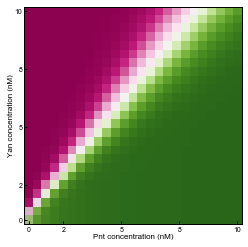

In [14]:
fig = occupancies.plot_overall_occupancy(species='Pnt', cmap=plt.cm.PiYG, mask=True)

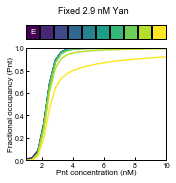

In [16]:
fig = occupancies.plot_contours(species='Pnt', variable='Pnt', fixed=5, figsize=(2.5, 2.5))

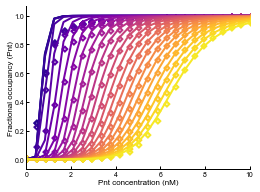

In [7]:
_ = occupancies.show_model()

In [19]:
old = np.load('old_occ.npy')

In [20]:
old.shape

(12, 625, 3)

In [21]:
new = occupancies.occupancies

In [23]:
np.allclose(old, new)#, atol=1e-3, rtol=1e-5)

True

In [17]:
for x, y in zip(old.flatten(), new.flatten()):
    if abs(x-y) > .01:
        print(x, y)

0.016139741241422145 0.032584378967195904
0.9838602587585779 0.9674156210328041
0.0006530117376877254 0.012072284303112357
0.9993469882623123 0.9879277156968876
0.015883872369207186 0.032325761764098626
0.9841161276307928 0.9676742382359014
0.00032905708627206653 0.011748408603290628
0.9996709429137279 0.9882515913967094
